# 1-. Lectura de datos 


In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import json as js
from datetime import datetime
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt    
from sqlalchemy import create_engine
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings('ignore')

In [2]:
ruta = '/Users/usuario/Desktop/Luis/Ts/Base de datos' 
l_arch = os.listdir(ruta)
l_arch

['2018_Yellow_Taxi_Trip_Data.csv', 'catalogo.json']

In [4]:
muestra= [
    x
    for x in pd.read_csv(os.path.join(ruta, l_arch[0]), chunksize=10000000)
]

In [5]:
df=pd.concat(muestra,ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112234626 entries, 0 to 112234625
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
dtypes: float64(8), int64(6), object(3)
memory usage: 14.2+ GB


##  Muestra aleatoria 

Decidimos armar una muestra aleatoria representativa de tamaño n ,con el siguiente calculo 
### $$n=\frac{Z^2p(1-p)}{\frac{e^2}{1+\frac{Z^2p(1-p)}{Ne^2}}}$$

Donde:

Z es el score de los intervalos de confianza

N el tamaño de la población

p es la desviación estándar 

_e_ es el margen de error 

Como no sabemos cuanta  desviación estándar de la población le asignamoes el valor  0.5 para asegurarse de que la muestra sea lo suficientemente grande, ademas escojeomos un error de $0.01\%$ ademas con tenemos un nivel de confianza de $99\% , Z=2.576$  y nuestra $N = 112234625$, asi que 

### $$n=\frac{2.576^2 0.5 (1-0.5)}{\frac{0.001^2}{1+\frac{2.576^2 0.5 (1-0.5)}{112234625*0.001^2}}}=1683465$$

In [6]:
x=random.sample(range(0,112234624),1683465)

In [16]:
df_muestra=df.iloc[x,]

In [18]:
df_muestra.head()

VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
12497563         2  11/06/2018 12:42:24 PM  11/06/2018 12:54:49 PM   
49556802         1  02/16/2018 07:19:59 PM  02/16/2018 07:26:41 PM   
48232374         1  02/12/2018 04:50:01 PM  02/12/2018 05:43:55 PM   
71005448         2  03/28/2018 07:58:44 PM  03/28/2018 08:07:14 PM   
11286082         1  11/02/2018 06:34:49 AM  11/02/2018 06:50:07 AM   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
12497563                1           0.87           1                  N   
49556802                0           1.50           1                  N   
48232374                3          22.60           2                  N   
71005448                1           1.61           1                  N   
11286082                1           2.70           1                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
12497563           229           237             2          9.0    0.0   
49556802            48           158             1          7.0    1.0   
48232374           132            48             2         52.0    0.0   
71005448            68           211             1          8.0    1.0   
11286082            79           230             1         12.5    0.0   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
12497563      0.5        0.00          0.00                    0.3   
49556802      0.5        1.32          0.00                    0.3   
48232374      0.5        0.00          5.76                    0.3   
71005448      0.5        1.00          0.00                    0.3   
11286082      0.5        2.65          0.00                    0.3   

          total_amount  
12497563          9.80  
49556802         10.12  
48232374         58.56  
71005448         10.80  
11286082         15.95

Hacemos un csv de la muestra para tener la muestra mas rapido y no cargar el codigo pasado, ya que es mas facil correr directamente el csv para otra persona, o también nos sirve de respando en caso de que el kernel no funcione 

In [ ]:
df_muestra.to_csv('muestra.csv',index=False)

In [7]:
df_muestra=pd.read_csv('muestra.csv')

In [8]:
df_muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683465 entries, 0 to 1683464
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1683465 non-null  int64  
 1   tpep_pickup_datetime   1683465 non-null  object 
 2   tpep_dropoff_datetime  1683465 non-null  object 
 3   passenger_count        1683465 non-null  int64  
 4   trip_distance          1683465 non-null  float64
 5   RatecodeID             1683465 non-null  int64  
 6   store_and_fwd_flag     1683465 non-null  object 
 7   PULocationID           1683465 non-null  int64  
 8   DOLocationID           1683465 non-null  int64  
 9   payment_type           1683465 non-null  int64  
 10  fare_amount            1683465 non-null  float64
 11  extra                  1683465 non-null  float64
 12  mta_tax                1683465 non-null  float64
 13  tip_amount             1683465 non-null  float64
 14  tolls_amount      

In [11]:
ks_2samp(df['total_amount'],df_muestra['total_amount'])

KstestResult(statistic=0.0007187510657458152, pvalue=0.3581319351994644)

In [12]:
ks_2samp(df['PULocationID'],df_muestra['PULocationID'])

KstestResult(statistic=0.0005955357663962046, pvalue=0.5984763940478086)

Podemos ver que nuestra muestra realmente es representativa 

## Catalogos 

Como ya tenemos un catalogo en json simplemte los cargamos 

In [13]:
catalogos = js.load(open(os.path.join(ruta, l_arch[-1]), 'rb'))

Como no tenemos el catalogo de las zonas pero si tenemos un _csv_ solamente lo cargaremos 

In [14]:
PULocationID = pd.read_csv('taxi+_zone_lookup.csv')
PULocationID.columns = [
    'PULocationID', 'PUBorough', 'PUZone', 'PUservice_zone'
]
DOLocationID = pd.read_csv('taxi+_zone_lookup.csv')
DOLocationID.columns = [
    'DOLocationID', 'DOBorough', 'DOZone', 'DOservice_zone'
]

###  Creacion de tuplas de catalogos 

In [15]:
l_cat = [(x,
          pd.DataFrame.from_dict(
              catalogos[x], orient='index',
              columns=["x_%s" % x]).reset_index().rename(columns={'index': x}))
         for x in catalogos.keys()]
l_catzon = [('PULocationID', PULocationID), ('DOLocationID', DOLocationID)]

##  Unir datos con los catalogos 

In [16]:
for key, cat in l_cat:
    print(key)
    df_muestra[key] = df_muestra[key].fillna(9999).astype('S')
    cat[key] = cat[key].astype('S')
    df_muestra = df_muestra.merge(cat, on=key, how='left').drop(
        key, axis=1).rename(columns={'x_%s' % key: key})

VendorID
RatecodeID
store_and_fwd_flag
payment_type


In [17]:
for key, cat in l_catzon:
    print(key)
    df_muestra[key] = df_muestra[key].fillna(9999).astype('S')
    cat[key] = cat[key].astype('S')
    df_muestra = df_muestra.merge(cat, on=key, how='left').drop(
        key, axis=1).rename(columns={'x_%s' % key: key})

PULocationID
DOLocationID


## Cambio de tipo de dato 

Vemos que el unico tipo de dato que no coincide solo las fechas, asi que las pondremos en tipo date 


In [18]:
df_muestra['tpep_pickup_datetime'] = df_muestra['tpep_pickup_datetime'].map(
    lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df_muestra['tpep_dropoff_datetime']=df_muestra['tpep_dropoff_datetime'].map(
    lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df_muestra['tpep_pickup_datetime']=df_muestra['tpep_pickup_datetime'].map(lambda x:x.replace(year=2018))
df_muestra['tpep_dropoff_datetime']=df_muestra['tpep_dropoff_datetime'].map(lambda x:x.replace(year=2018))

In [19]:
df_muestra.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2018-11-06 12:42:24   2018-11-06 12:54:49                1           0.87   
1  2018-02-16 19:19:59   2018-02-16 19:26:41                0           1.50   
2  2018-02-12 16:50:01   2018-02-12 17:43:55                3          22.60   
3  2018-03-28 19:58:44   2018-03-28 20:07:14                1           1.61   
4  2018-11-02 06:34:49   2018-11-02 06:50:07                1           2.70   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.0      0.5        0.00          0.00   
1          7.0    1.0      0.5        1.32          0.00   
2         52.0    0.0      0.5        0.00          5.76   
3          8.0    1.0      0.5        1.00          0.00   
4         12.5    0.0      0.5        2.65          0.00   

   improvement_surcharge  ...                      VendorID     RatecodeID  \
0                    0.3  ...                  VeriFone Inc  Standard rate   
1                    0.3  ...  Creative Mobile Technologies  Standard rate   
2                    0.3  ...  Creative Mobile Technologies            JFK   
3                    0.3  ...                  VeriFone Inc  Standard rate   
4                    0.3  ...  Creative Mobile Technologies  Standard rate   

             store_and_fwd_flag payment_type  PUBorough  \
0  not a store and forward trip         Cash  Manhattan   
1  not a store and forward trip  Credit card  Manhattan   
2  not a store and forward trip         Cash     Queens   
3  not a store and forward trip  Credit card  Manhattan   
4  not a store and forward trip  Credit card  Manhattan   

                          PUZone PUservice_zone  DOBorough  \
0  Sutton Place/Turtle Bay North    Yellow Zone  Manhattan   
1                   Clinton East    Yellow Zone  Manhattan   
2                    JFK Airport       Airports  Manhattan   
3                   East Chelsea    Yellow Zone  Manhattan   
4                   East Village    Yellow Zone  Manhattan   

                          DOZone DOservice_zone  
0          Upper East Side South    Yellow Zone  
1  Meatpacking/West Village West    Yellow Zone  
2                   Clinton East    Yellow Zone  
3                           SoHo    Yellow Zone  
4      Times Sq/Theatre District    Yellow Zone  

[5 rows x 21 columns]

#  Limpieza de datos 

##  Missings 

In [21]:
miss=1-df_muestra.describe().T[['count']]/len(df_muestra)

In [22]:
miss[['count']].describe()

count
count    9.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0

Vemos que en nuestras variables de cuantitativas no hay n.a,pero veamos en las cualitativas 

In [32]:
df_muestra.shape,df_muestra.dropna().shape

((1683465, 21), (1643539, 21))

Vemos que tenemos Na's, veamos que teanto representa quitar esos Na's

In [38]:
df_muestra.dropna().shape[0]/df_muestra.shape[0]

0.9762834392161405

Vemos que esos Na respresnete menos del 4% de los datos , asi que obtamos por eliminar esos N.a's 

In [39]:
df_muestra.dropna(inplace=True)

In [40]:
df_muestra.describe()

passenger_count  trip_distance   fare_amount         extra  \
count     1.643539e+06   1.643539e+06  1.643539e+06  1.643539e+06   
mean      1.602218e+00   2.907798e+00  1.283130e+01  3.313339e-01   
std       1.247471e+00   3.697920e+00  1.251826e+01  4.627568e-01   
min       0.000000e+00   0.000000e+00 -1.600000e+02 -4.500000e+00   
25%       1.000000e+00   9.700000e-01  6.500000e+00  0.000000e+00   
50%       1.000000e+00   1.600000e+00  9.500000e+00  0.000000e+00   
75%       2.000000e+00   3.000000e+00  1.450000e+01  5.000000e-01   
max       8.000000e+00   3.808300e+02  7.011500e+03  1.790000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.643539e+06  1.643539e+06  1.643539e+06           1.643539e+06   
mean   4.977158e-01  1.854000e+00  3.356426e-01           2.995652e-01   
std    3.804835e-02  2.470432e+00  1.742505e+00           1.563230e-02   
min   -5.000000e-01 -8.000000e+01 -1.500000e+01          -3.000000e-01   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.400000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  2.450000e+00  0.000000e+00           3.000000e-01   
max    8.700000e-01  2.100000e+02  7.676600e+02           3.000000e-01   

       total_amount  
count  1.643539e+06  
mean   1.615335e+01  
std    1.491245e+01  
min   -1.608000e+02  
25%    8.500000e+00  
50%    1.180000e+01  
75%    1.776000e+01  
max    7.012800e+03

Vemos que tenemos valores con 0 y negativos en la cuestion financierea, entonces veamos que tan coveniente es eliminarlos

In [64]:
df_muestra.shape,df_muestra.drop(df_muestra[df_muestra['total_amount']<=0].index,axis=0).shape

((1643539, 21), (1642363, 21))

Vemos que los podemos quitar puesto que no respresentan muchos datos

In [69]:
df_muestra=df_muestra.drop(df_muestra[df_muestra['total_amount'] <= 0].index,
                axis=0).reset_index(drop=True)

Veamos que pasa con lo mismo con los viajes con distacia negativa y cero , asi que veamos cuanto representa eso para ver si los borramos 

In [72]:
df_muestra[df_muestra['trip_distance']<=0].shape[0]/df_muestra.shape[0]

0.0047997915199015076

Vemos que no nos representan nada de los datos, asi que que los podemos eliminar 

In [73]:
df_muestra=df_muestra.drop(df_muestra[df_muestra['trip_distance'] <= 0].index,
                axis=0).reset_index(drop=True)

In [75]:
df_muestra.describe()

passenger_count  trip_distance   fare_amount         extra  \
count     1.634480e+06   1.634480e+06  1.634480e+06  1.634480e+06   
mean      1.603389e+00   2.923550e+00  1.281220e+01  3.318700e-01   
std       1.248539e+00   3.701847e+00  1.235774e+01  4.602604e-01   
min       0.000000e+00   1.000000e-02  0.000000e+00 -5.000000e-01   
25%       1.000000e+00   9.800000e-01  6.500000e+00  0.000000e+00   
50%       1.000000e+00   1.610000e+00  9.500000e+00  0.000000e+00   
75%       2.000000e+00   3.000000e+00  1.450000e+01  5.000000e-01   
max       7.000000e+00   3.808300e+02  7.011500e+03  1.790000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.634480e+06  1.634480e+06  1.634480e+06           1.634480e+06   
mean   4.987521e-01  1.850677e+00  3.342323e-01           2.999829e-01   
std    2.495153e-02  2.434375e+00  1.740650e+00           2.262876e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.430000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  2.450000e+00  0.000000e+00           3.000000e-01   
max    8.700000e-01  2.100000e+02  7.676600e+02           3.000000e-01   

       total_amount  
count  1.634480e+06  
mean   1.613150e+01  
std    1.473696e+01  
min    3.000000e-01  
25%    8.550000e+00  
50%    1.180000e+01  
75%    1.776000e+01  
max    7.012800e+03

Vemos que aun conservamos un valor negativo en extra , asi que lo borramos esos negativos, pues ahi si podemos tener 0 y ya vimos que los valores negativos no representan nuestros datos 

In [76]:
df_muestra=df_muestra.drop(df_muestra[df_muestra['extra'] < 0].index,
                axis=0).reset_index(drop=True)

## Acomodamiento de los datos 

Ponemos los valores constantes correspondientes, en este caso son los impuestos y el cargo extra

In [78]:
df_muestra['mta_tax'] = df_muestra['mta_tax'].map(
    lambda x: x if x == 0.5 else (0 if x == 0 else 0.5) )
df_muestra['improvement_surcharge'] = df_muestra['improvement_surcharge'].map(
    lambda x: x if x == 0.3 else (0 if x == 0 else 0.3))

Ahora pongamos los valores correctos del total, lo que vendria siendo la suma total de los pagos 

In [79]:
pago=['fare_amount','extra','mta_tax','tip_amount',
          'tolls_amount','improvement_surcharge']
aux=[round(x,2) for x in df_muestra[pago].sum(axis=1)]
df_muestra['total_amount']=aux 
    

In [80]:
df_muestra.describe()

passenger_count  trip_distance   fare_amount         extra  \
count     1.634479e+06   1.634479e+06  1.634479e+06  1.634479e+06   
mean      1.603389e+00   2.923552e+00  1.281220e+01  3.318705e-01   
std       1.248540e+00   3.701848e+00  1.235775e+01  4.602601e-01   
min       0.000000e+00   1.000000e-02  0.000000e+00  0.000000e+00   
25%       1.000000e+00   9.800000e-01  6.500000e+00  0.000000e+00   
50%       1.000000e+00   1.610000e+00  9.500000e+00  0.000000e+00   
75%       2.000000e+00   3.000000e+00  1.450000e+01  5.000000e-01   
max       7.000000e+00   3.808300e+02  7.011500e+03  1.790000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.634479e+06  1.634479e+06  1.634479e+06           1.634479e+06   
mean   4.987519e-01  1.850678e+00  3.342325e-01           2.999829e-01   
std    2.494984e-02  2.434376e+00  1.740650e+00           2.262876e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.430000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  2.450000e+00  0.000000e+00           3.000000e-01   
max    5.000000e-01  2.100000e+02  7.676600e+02           3.000000e-01   

       total_amount  
count  1.634479e+06  
mean   1.612772e+01  
std    1.473521e+01  
min    3.000000e-01  
25%    8.550000e+00  
50%    1.180000e+01  
75%    1.776000e+01  
max    7.012800e+03

Eliminaremos la columna de Vendor, ya que esa no nos aporta informacion de los viajes 

In [85]:
df_muestra=df_muestra.drop('VendorID',axis=1)

In [87]:
df_muestra.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2018-11-06 12:42:24   2018-11-06 12:54:49                1           0.87   
1  2018-02-16 19:19:59   2018-02-16 19:26:41                0           1.50   
2  2018-02-12 16:50:01   2018-02-12 17:43:55                3          22.60   
3  2018-03-28 19:58:44   2018-03-28 20:07:14                1           1.61   
4  2018-11-02 06:34:49   2018-11-02 06:50:07                1           2.70   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.0      0.5        0.00          0.00   
1          7.0    1.0      0.5        1.32          0.00   
2         52.0    0.0      0.5        0.00          5.76   
3          8.0    1.0      0.5        1.00          0.00   
4         12.5    0.0      0.5        2.65          0.00   

   improvement_surcharge  total_amount     RatecodeID  \
0                    0.3          9.80  Standard rate   
1                    0.3         10.12  Standard rate   
2                    0.3         58.56            JFK   
3                    0.3         10.80  Standard rate   
4                    0.3         15.95  Standard rate   

             store_and_fwd_flag payment_type  PUBorough  \
0  not a store and forward trip         Cash  Manhattan   
1  not a store and forward trip  Credit card  Manhattan   
2  not a store and forward trip         Cash     Queens   
3  not a store and forward trip  Credit card  Manhattan   
4  not a store and forward trip  Credit card  Manhattan   

                          PUZone PUservice_zone  DOBorough  \
0  Sutton Place/Turtle Bay North    Yellow Zone  Manhattan   
1                   Clinton East    Yellow Zone  Manhattan   
2                    JFK Airport       Airports  Manhattan   
3                   East Chelsea    Yellow Zone  Manhattan   
4                   East Village    Yellow Zone  Manhattan   

                          DOZone DOservice_zone  
0          Upper East Side South    Yellow Zone  
1  Meatpacking/West Village West    Yellow Zone  
2                   Clinton East    Yellow Zone  
3                           SoHo    Yellow Zone  
4      Times Sq/Theatre District    Yellow Zone

#  Conexion a sql 

In [88]:
credenciales = js.load(open('cred.json','rb'))

In [89]:
usuario = credenciales['user']
pwd = credenciales['pwd']
host = credenciales['host']
port = credenciales['port']
db = credenciales['db']

In [90]:
engine = create_engine(f'mysql+pymysql://{usuario}:{pwd}@{host}:{port}/{db}').connect()

# E-R 


## Entidad Retecode

In [91]:
ent_rate=df_muestra[['RatecodeID']].copy().drop_duplicates().dropna().reset_index(drop=True).rename(
    columns={'RatecodeID': 'Retacode_code'})
ent_rate.insert(0,'ID', ent_rate.index+1)
ent_rate.to_sql(con=engine,
                name='Ratecode',
                if_exists='replace',
                index=False)

In [92]:
ent_rate.to_csv('Ratecode.csv',index=False)

## Entidad  pago

In [93]:
ent_p = df_muestra[['payment_type']].drop_duplicates().reset_index(drop=True).rename(
    columns={'payment_type': 'payment_type_code'})   
ent_p.insert(0,'ID', ent_p.index+1)
ent_p.to_sql(con=engine,
                name='Pago',
               if_exists='replace',
               index=False)

In [94]:
ent_p.to_csv('Pago.csv',index=False)

## Entidad Zona 

Como ya tenemos el catalogo de la zona en tabla, solamente lo pondremos 

In [95]:
ent_z = pd.read_csv('taxi+_zone_lookup.csv').rename(columns={'LocationID': 'ID'})
ent_z.to_sql(con=engine,
                name='Zona',
                if_exists='replace',
                index=False)

In [96]:
ent_z.to_csv('Zona.csv',index=False)

## Entidad viaje 

Eliminaremos las columnas que no nos aporte info 

In [97]:
df_muestra.drop(['store_and_fwd_flag','passenger_count'],axis=1,inplace=True)

In [98]:
df_muestra.head()

tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  fare_amount  \
0  2018-11-06 12:42:24   2018-11-06 12:54:49           0.87          9.0   
1  2018-02-16 19:19:59   2018-02-16 19:26:41           1.50          7.0   
2  2018-02-12 16:50:01   2018-02-12 17:43:55          22.60         52.0   
3  2018-03-28 19:58:44   2018-03-28 20:07:14           1.61          8.0   
4  2018-11-02 06:34:49   2018-11-02 06:50:07           2.70         12.5   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    0.0      0.5        0.00          0.00                    0.3   
1    1.0      0.5        1.32          0.00                    0.3   
2    0.0      0.5        0.00          5.76                    0.3   
3    1.0      0.5        1.00          0.00                    0.3   
4    0.0      0.5        2.65          0.00                    0.3   

   total_amount     RatecodeID payment_type  PUBorough  \
0          9.80  Standard rate         Cash  Manhattan   
1         10.12  Standard rate  Credit card  Manhattan   
2         58.56            JFK         Cash     Queens   
3         10.80  Standard rate  Credit card  Manhattan   
4         15.95  Standard rate  Credit card  Manhattan   

                          PUZone PUservice_zone  DOBorough  \
0  Sutton Place/Turtle Bay North    Yellow Zone  Manhattan   
1                   Clinton East    Yellow Zone  Manhattan   
2                    JFK Airport       Airports  Manhattan   
3                   East Chelsea    Yellow Zone  Manhattan   
4                   East Village    Yellow Zone  Manhattan   

                          DOZone DOservice_zone  
0          Upper East Side South    Yellow Zone  
1  Meatpacking/West Village West    Yellow Zone  
2                   Clinton East    Yellow Zone  
3                           SoHo    Yellow Zone  
4      Times Sq/Theatre District    Yellow Zone

In [100]:
df_muestra=df_muestra.merge(ent_rate,
                 left_on='RatecodeID',
                 right_on='Retacode_code',
                 how='left').drop(['RatecodeID','Retacode_code'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_Ratecode'},inplace=True)

In [101]:
df_muestra.head()

tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  fare_amount  \
0  2018-11-06 12:42:24   2018-11-06 12:54:49           0.87          9.0   
1  2018-02-16 19:19:59   2018-02-16 19:26:41           1.50          7.0   
2  2018-02-12 16:50:01   2018-02-12 17:43:55          22.60         52.0   
3  2018-03-28 19:58:44   2018-03-28 20:07:14           1.61          8.0   
4  2018-11-02 06:34:49   2018-11-02 06:50:07           2.70         12.5   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    0.0      0.5        0.00          0.00                    0.3   
1    1.0      0.5        1.32          0.00                    0.3   
2    0.0      0.5        0.00          5.76                    0.3   
3    1.0      0.5        1.00          0.00                    0.3   
4    0.0      0.5        2.65          0.00                    0.3   

   total_amount payment_type  PUBorough                         PUZone  \
0          9.80         Cash  Manhattan  Sutton Place/Turtle Bay North   
1         10.12  Credit card  Manhattan                   Clinton East   
2         58.56         Cash     Queens                    JFK Airport   
3         10.80  Credit card  Manhattan                   East Chelsea   
4         15.95  Credit card  Manhattan                   East Village   

  PUservice_zone  DOBorough                         DOZone DOservice_zone  \
0    Yellow Zone  Manhattan          Upper East Side South    Yellow Zone   
1    Yellow Zone  Manhattan  Meatpacking/West Village West    Yellow Zone   
2       Airports  Manhattan                   Clinton East    Yellow Zone   
3    Yellow Zone  Manhattan                           SoHo    Yellow Zone   
4    Yellow Zone  Manhattan      Times Sq/Theatre District    Yellow Zone   

   fk_id_Ratecode  
0               1  
1               1  
2               2  
3               1  
4               1

In [102]:
df_muestra=df_muestra.merge(ent_p,
                 left_on='payment_type',
                 right_on='payment_type_code',
                 how='left').drop(['payment_type','payment_type_code'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_payment_type'},inplace=True)

In [103]:
df_muestra.head()

tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  fare_amount  \
0  2018-11-06 12:42:24   2018-11-06 12:54:49           0.87          9.0   
1  2018-02-16 19:19:59   2018-02-16 19:26:41           1.50          7.0   
2  2018-02-12 16:50:01   2018-02-12 17:43:55          22.60         52.0   
3  2018-03-28 19:58:44   2018-03-28 20:07:14           1.61          8.0   
4  2018-11-02 06:34:49   2018-11-02 06:50:07           2.70         12.5   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    0.0      0.5        0.00          0.00                    0.3   
1    1.0      0.5        1.32          0.00                    0.3   
2    0.0      0.5        0.00          5.76                    0.3   
3    1.0      0.5        1.00          0.00                    0.3   
4    0.0      0.5        2.65          0.00                    0.3   

   total_amount  PUBorough                         PUZone PUservice_zone  \
0          9.80  Manhattan  Sutton Place/Turtle Bay North    Yellow Zone   
1         10.12  Manhattan                   Clinton East    Yellow Zone   
2         58.56     Queens                    JFK Airport       Airports   
3         10.80  Manhattan                   East Chelsea    Yellow Zone   
4         15.95  Manhattan                   East Village    Yellow Zone   

   DOBorough                         DOZone DOservice_zone  fk_id_Ratecode  \
0  Manhattan          Upper East Side South    Yellow Zone               1   
1  Manhattan  Meatpacking/West Village West    Yellow Zone               1   
2  Manhattan                   Clinton East    Yellow Zone               2   
3  Manhattan                           SoHo    Yellow Zone               1   
4  Manhattan      Times Sq/Theatre District    Yellow Zone               1   

   fk_id_payment_type  
0                   1  
1                   2  
2                   1  
3                   2  
4                   2

In [104]:
df_muestra=df_muestra.merge(ent_z,
                 left_on=['PUBorough','PUZone','PUservice_zone'],
                 right_on=['Borough','Zone','service_zone'],
                 how='left').drop(['PUBorough','PUZone','PUservice_zone',
                                  'Borough','Zone','service_zone'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_PUZone'},inplace=True)

df_muestra=df_muestra.merge(ent_z,
                 left_on=['DOBorough','DOZone','DOservice_zone'],
                 right_on=['Borough','Zone','service_zone'],
                 how='left').drop(['DOBorough','DOZone','DOservice_zone',
                                  'Borough','Zone','service_zone'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_DOZone'},inplace=True)

In [105]:
df_muestra.head()

tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  fare_amount  \
0  2018-11-06 12:42:24   2018-11-06 12:54:49           0.87          9.0   
1  2018-02-16 19:19:59   2018-02-16 19:26:41           1.50          7.0   
2  2018-02-12 16:50:01   2018-02-12 17:43:55          22.60         52.0   
3  2018-03-28 19:58:44   2018-03-28 20:07:14           1.61          8.0   
4  2018-11-02 06:34:49   2018-11-02 06:50:07           2.70         12.5   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    0.0      0.5        0.00          0.00                    0.3   
1    1.0      0.5        1.32          0.00                    0.3   
2    0.0      0.5        0.00          5.76                    0.3   
3    1.0      0.5        1.00          0.00                    0.3   
4    0.0      0.5        2.65          0.00                    0.3   

   total_amount  fk_id_Ratecode  fk_id_payment_type  fk_id_PUZone  \
0          9.80               1                   1           229   
1         10.12               1                   2            48   
2         58.56               2                   1           132   
3         10.80               1                   2            68   
4         15.95               1                   2            79   

   fk_id_DOZone  
0           237  
1           158  
2            48  
3           211  
4           230

In [106]:
df_muestra.insert(0,'ID',df_muestra.index+1)

In [107]:
df_muestra.head()

ID tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  fare_amount  \
0   1  2018-11-06 12:42:24   2018-11-06 12:54:49           0.87          9.0   
1   2  2018-02-16 19:19:59   2018-02-16 19:26:41           1.50          7.0   
2   3  2018-02-12 16:50:01   2018-02-12 17:43:55          22.60         52.0   
3   4  2018-03-28 19:58:44   2018-03-28 20:07:14           1.61          8.0   
4   5  2018-11-02 06:34:49   2018-11-02 06:50:07           2.70         12.5   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    0.0      0.5        0.00          0.00                    0.3   
1    1.0      0.5        1.32          0.00                    0.3   
2    0.0      0.5        0.00          5.76                    0.3   
3    1.0      0.5        1.00          0.00                    0.3   
4    0.0      0.5        2.65          0.00                    0.3   

   total_amount  fk_id_Ratecode  fk_id_payment_type  fk_id_PUZone  \
0          9.80               1                   1           229   
1         10.12               1                   2            48   
2         58.56               2                   1           132   
3         10.80               1                   2            68   
4         15.95               1                   2            79   

   fk_id_DOZone  
0           237  
1           158  
2            48  
3           211  
4           230

Guardamos el df para posteriormente cargarlo y no hacer todo el proceso anterior

In [108]:
df_muestra.to_pickle('viaje.pickle')

In [2]:
df_muestra=pd.read_pickle('viaje.pickle')

In [110]:
df_muestra.to_sql(con=engine,
               name='viaje',
               if_exists='replace',
               chunksize=10000,
               index=False)

In [111]:
df_muestra.to_csv('viaje.csv',index=False)

# Ventanas de Tiempo 

## Catalogo de tiempo 

In [3]:
cat=df_muestra.copy()

In [4]:
cat=cat[['tpep_pickup_datetime']]

In [5]:
cat['Dia'] = cat['tpep_pickup_datetime'].map(lambda x:x.strftime('%j')).astype('int')

In [6]:
aux = cat[['Dia']].drop_duplicates('Dia').sort_values("Dia").sort_values(
    by='Dia').reset_index(drop=True)

aux['id'] = aux.index

cat = cat.merge(aux, on='Dia', how='inner')

In [7]:
cat

tpep_pickup_datetime  Dia   id
0        2018-11-06 12:42:24  310  309
1        2018-11-06 11:53:38  310  309
2        2018-11-06 10:09:36  310  309
3        2018-11-06 11:02:18  310  309
4        2018-11-06 15:42:23  310  309
...                      ...  ...  ...
1635081  2018-12-19 18:49:10  353  352
1635082  2018-12-19 18:59:47  353  352
1635083  2018-12-19 21:35:22  353  352
1635084  2018-12-19 10:15:29  353  352
1635085  2018-12-19 09:19:11  353  352

[1635086 rows x 3 columns]

In [8]:
df_muestra = df_muestra.merge(cat.drop('Dia',axis=1),
                             on='tpep_pickup_datetime',how='inner')

In [9]:
df_muestra.head()

ID tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  fare_amount  \
0   1  2018-11-06 12:42:24   2018-11-06 12:54:49           0.87          9.0   
1   2  2018-02-16 19:19:59   2018-02-16 19:26:41           1.50          7.0   
2   3  2018-02-12 16:50:01   2018-02-12 17:43:55          22.60         52.0   
3   4  2018-03-28 19:58:44   2018-03-28 20:07:14           1.61          8.0   
4   5  2018-11-02 06:34:49   2018-11-02 06:50:07           2.70         12.5   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    0.0      0.5        0.00          0.00                    0.3   
1    1.0      0.5        1.32          0.00                    0.3   
2    0.0      0.5        0.00          5.76                    0.3   
3    1.0      0.5        1.00          0.00                    0.3   
4    0.0      0.5        2.65          0.00                    0.3   

   total_amount  fk_id_Ratecode  fk_id_payment_type  fk_id_PUZone  \
0          9.80               1                   1           229   
1         10.12               1                   2            48   
2         58.56               2                   1           132   
3         10.80               1                   2            68   
4         15.95               1                   2            79   

   fk_id_DOZone   id  
0           237  309  
1           158   46  
2            48   42  
3           211   86  
4           230  305

Agregamos el volumen del viaje,como cada viaje es individual el volumen es 1 

In [10]:
df_muestra['Volumen']=1 

In [11]:
df_muestra['hora']=df_muestra['tpep_pickup_datetime'].map(lambda x:x.strftime('%H')).astype('int')

Ahora agrupamos dia y id , pero para ello,quitamos las variables que no nos sirvan, la finalidad de este agrupamiento es para ver cuantos viajes se hicieron en esa hora en ese  dia 

In [12]:
df_muestra.drop(['ID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                'fk_id_Ratecode','fk_id_payment_type','fk_id_DOZone'],
               axis=1,inplace=True)

In [13]:
um=['id','hora','fk_id_PUZone']
df_muestra=df_muestra.groupby(um).sum().reset_index()

In [14]:
df_muestra.head()

id  hora  fk_id_PUZone  trip_distance  fare_amount  extra  mta_tax  \
0   0     0            13          15.40         53.0    1.0      1.0   
1   0     0            41           0.04         28.0    0.0      0.0   
2   0     0            42           0.60          4.5    0.5      0.5   
3   0     0            43          34.50        151.5    3.5      3.5   
4   0     0            45           3.60         19.0    1.0      1.0   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  Volumen  
0        4.05           0.0                    0.6         59.65        2  
1        5.72           0.0                    0.6         34.32        2  
2        0.00           0.0                    0.3          5.80        1  
3        0.00           0.0                    2.1        160.60        7  
4        1.85           0.0                    0.6         23.45        2

## Anclas 

In [27]:
vobs=14
vdes=1 

In [28]:
vini=vobs-1
vfin=df_muestra['id'].max()-vdes
vini,vfin

(13, 363)

In [29]:
anclas=list(range(vini,vfin+1))

In [30]:
len(anclas)

351

In [19]:
df_muestra.head()

id  hora  fk_id_PUZone  trip_distance  fare_amount  extra  mta_tax  \
0   0     0            13          15.40         53.0    1.0      1.0   
1   0     0            41           0.04         28.0    0.0      0.0   
2   0     0            42           0.60          4.5    0.5      0.5   
3   0     0            43          34.50        151.5    3.5      3.5   
4   0     0            45           3.60         19.0    1.0      1.0   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  Volumen  
0        4.05           0.0                    0.6         59.65        2  
1        5.72           0.0                    0.6         34.32        2  
2        0.00           0.0                    0.3          5.80        1  
3        0.00           0.0                    2.1        160.60        7  
4        1.85           0.0                    0.6         23.45        2

In [31]:
def predictoras(ancla):
    step=2
    aux=df_muestra.loc[(df_muestra['id']>=(ancla-vobs+1))&(df_muestra['id']<=ancla)]
    aux['id'].replace(dict(zip(reversed(aux['id'].unique()),range(1,vobs+1))),inplace=True)
    var=['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'Volumen']
    aux = aux.pivot_table(index=['hora','fk_id_PUZone'],
                        columns='id',
                        values=var,
                        aggfunc=['min', 'max', 'mean'])
    aux=aux.fillna(0)
    aux.columns=[f'{x}_{y}_{z}' for x,y,z in aux.columns]
    varx=sorted(set(["_".join(c.split('_')[:-1]) for c in aux.columns]))
    for k in range(step,vobs+step,step):
        for v in varx:
            vec=[f'{v}_{i+1}' for i in range(k)]
            aux[f'v_mean_{v}_{k}']=aux[vec].mean(axis=1)
            aux[f'v_max_{v}_{k}']=aux[vec].max(axis=1)
            aux[f'v_min_{v}_{k}']=aux[vec].min(axis=1)
    aux=aux.filter(like='v_').reset_index()
    aux.insert(1,'ancla',ancla)
      
    return(aux)


In [32]:
predictoras(anclas[-1])

363


hora  ancla  fk_id_PUZone  v_mean_max_Volumen_2  v_max_max_Volumen_2  \
0        0    363             4                   0.5                  1.0   
1        0    363             7                   0.5                  1.0   
2        0    363            13                   0.0                  0.0   
3        0    363            17                   0.0                  0.0   
4        0    363            24                   0.0                  0.0   
...    ...    ...           ...                   ...                  ...   
2150    23    363           255                   0.5                  1.0   
2151    23    363           256                   0.0                  0.0   
2152    23    363           261                   0.5                  1.0   
2153    23    363           262                   0.0                  0.0   
2154    23    363           263                   1.0                  1.0   

      v_min_max_Volumen_2  v_mean_max_extra_2  v_max_max_extra_2  \
0                     0.0                0.25                0.5   
1                     0.0                0.25                0.5   
2                     0.0                0.00                0.0   
3                     0.0                0.00                0.0   
4                     0.0                0.00                0.0   
...                   ...                 ...                ...   
2150                  0.0                0.25                0.5   
2151                  0.0                0.00                0.0   
2152                  0.0                0.25                0.5   
2153                  0.0                0.00                0.0   
2154                  1.0                0.50                0.5   

      v_min_max_extra_2  v_mean_max_fare_amount_2  ...  \
0                   0.0                     10.50  ...   
1                   0.0                      4.25  ...   
2                   0.0                      0.00  ...   
3                   0.0                      0.00  ...   
4                   0.0                      0.00  ...   
...                 ...                       ...  ...   
2150                0.0                      5.50  ...   
2151                0.0                      0.00  ...   
2152                0.0                      5.00  ...   
2153                0.0                      0.00  ...   
2154                0.5                      5.75  ...   

      v_min_min_tip_amount_14  v_mean_min_tolls_amount_14  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
...                       ...                         ...   
2150                      0.0                         0.0   
2151                      0.0                         0.0   
2152                      0.0                         0.0   
2153                      0.0                         0.0   
2154                      0.0                         0.0   

      v_max_min_tolls_amount_14  v_min_min_tolls_amount_14  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
2150                        0.0                        0.0   
2151                        0.0                        0.0   
2152                        0.0                        0.0   
2153                        0.0                        0.0   
2154                        0.0                        0.0   

      v_mean_min_total_amount_14  v_max_min_total_amount_14  \
0             

# ING. DE DATOS

## Matriz X 

In [ ]:
X=pd.concat(map(predictoras,anclas[-100:]),ignore_index=False)

In [34]:
X.to_pickle('Prueba2.pickle')

In [408]:
X=pd.read_pickle('Prueba2.pickle')

## Vector Y 

In [35]:
y=df_muestra[um+['Volumen']].copy()
y =y.groupby(um).sum().reset_index()

In [36]:
y['ancla']=y['id']-1

In [37]:
y.loc[y['ancla']==363]

id  hora  fk_id_PUZone  Volumen  ancla
403750  364     0            48        1    363
403751  364     0            68        3    363
403752  364     0            79        7    363
403753  364     0            90        1    363
403754  364     0           100        1    363
...     ...   ...           ...      ...    ...
404754  364    23           239        3    363
404755  364    23           244        1    363
404756  364    23           249        5    363
404757  364    23           262        2    363
404758  364    23           263        6    363

[1009 rows x 5 columns]

In [38]:
y.shape

(404759, 5)

In [39]:
y=X[['hora','fk_id_PUZone','ancla']].merge(y, on=['hora','fk_id_PUZone','ancla'],
            how='inner').drop('id',
                              axis=1).rename(columns={'Volumen': 'VolumenY'})

In [40]:
y.head()

hora  fk_id_PUZone  ancla  VolumenY
0     0             4    264         1
1     0            13    264         1
2     0            17    264         2
3     0            25    264         1
4     0            41    264         2

In [41]:
y.shape

(103141, 4)

<AxesSubplot:>

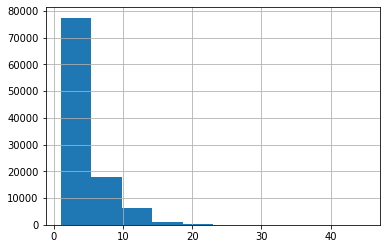

In [42]:
y['VolumenY'].hist()

In [43]:
X=X.merge(y[['hora','fk_id_PUZone','ancla']],on=['hora','fk_id_PUZone','ancla'],
         how='inner')

In [44]:
X.shape

(103141, 570)

##  Exploracion de datos de la matriz 

In [45]:
X.head()

hora  ancla  fk_id_PUZone  v_mean_max_Volumen_2  v_max_max_Volumen_2  \
0     0    264             4                   0.0                  0.0   
1     0    264            13                   0.5                  1.0   
2     0    264            17                   0.0                  0.0   
3     0    264            25                   0.0                  0.0   
4     0    264            41                   0.0                  0.0   

   v_min_max_Volumen_2  v_mean_max_extra_2  v_max_max_extra_2  \
0                  0.0                0.00                0.0   
1                  0.0                0.25                0.5   
2                  0.0                0.00                0.0   
3                  0.0                0.00                0.0   
4                  0.0                0.00                0.0   

   v_min_max_extra_2  v_mean_max_fare_amount_2  ...  v_min_min_tip_amount_14  \
0                0.0                      0.00  ...                      0.0   
1                0.0                     11.75  ...                      0.0   
2                0.0                      0.00  ...                      0.0   
3                0.0                      0.00  ...                      0.0   
4                0.0                      0.00  ...                      0.0   

   v_mean_min_tolls_amount_14  v_max_min_tolls_amount_14  \
0                    0.000000                       0.00   
1                    0.411429                       5.76   
2                    0.000000                       0.00   
3                    0.000000                       0.00   
4                    0.000000                       0.00   

   v_min_min_tolls_amount_14  v_mean_min_total_amount_14  \
0                        0.0                    6.729286   
1                        0.0                   11.062143   
2                        0.0                    1.021429   
3                        0.0                    8.657143   
4                        0.0                    5.715000   

   v_max_min_total_amount_14  v_min_min_total_amount_14  \
0                      62.41                        0.0   
1                      45.36                        0.0   
2                      14.30                        0.0   
3                      87.10                        0.0   
4                      33.10                        0.0   

   v_mean_min_trip_distance_14  v_max_min_trip_distance_14  \
0                     0.962143                        9.60   
1                     2.410714                       11.40   
2                     0.179286                        2.51   
3                     2.060714                       20.36   
4                     1.184286                        8.92   

   v_min_min_trip_distance_14  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 570 columns]

In [46]:
var=[v for v in X.columns if v[:2]=='v_']

In [47]:
miss=1-X[var].describe().T[['count']]/len(X)

In [48]:
miss[['count']].describe()

count
count  567.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0

Vemos que no hay valores faltantes 

## Datos Extremos 

In [49]:
l_extr = X[var].describe(percentiles=[0.01, 0.99]).T[[
    '1%', '99%'
]].reset_index().values.tolist()

In [50]:
for v,ci,cs in l_extr:
    X[f'ol_{v}']=((X[v]<ci)|(X[v]>cs)).astype('int')
varx=[v for v in X.columns if v[:2]=='ol']

In [51]:
X['extremo']=X[varx].max(axis=1)

In [52]:
X['extremo'].value_counts(True)

0    0.893738
1    0.106262
Name: extremo, dtype: float64

Vemos que tenemos 10% vemamos asi que no los eliminaremos 

In [53]:
X.drop(varx+['extremo'],axis=1,inplace=True)

## Multicolinealidad

In [54]:
from varclushi import VarClusHi

In [55]:
vc = VarClusHi(df=X,feat_list=var)
vc.varclus()

In [57]:
rs=vc.rsquare

In [58]:
rs

Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
0         0                 v_mean_max_Volumen_6  0.974022  0.892933  0.242635
1         0   v_mean_max_improvement_surcharge_6  0.974020  0.892933  0.242649
2         0                 v_mean_max_mta_tax_6  0.973959  0.893031  0.243448
3         0                v_mean_mean_Volumen_6  0.974022  0.892933  0.242635
4         0  v_mean_mean_improvement_surcharge_6  0.974020  0.892933  0.242649
..      ...                                  ...       ...       ...       ...
562      28  v_min_mean_improvement_surcharge_10  0.978567  0.912669  0.245427
563      28                v_min_mean_mta_tax_10  0.978094  0.912392  0.250050
564      28                 v_min_min_Volumen_10  0.978567  0.912658  0.245396
565      28   v_min_min_improvement_surcharge_10  0.978567  0.912669  0.245427
566      28                 v_min_min_mta_tax_10  0.978094  0.912392  0.250050

[567 rows x 5 columns]

In [59]:
rs=rs.sort_values(by=['Cluster','RS_Ratio'],ascending=[1,1]).reset_index(drop=True)
rs['importancia']=rs.groupby('Cluster').cumcount()+1 

In [60]:
rs=rs.loc[rs['importancia']==1]

In [61]:
best=rs['Variable'].tolist()

In [62]:
Xe=X[best].copy()

In [63]:
Xe[['hora','fk_id_PUZone','ancla']]=X[['hora','fk_id_PUZone','ancla']]

In [64]:
ye = y.merge(Xe[['hora','fk_id_PUZone','ancla']],on=['hora','fk_id_PUZone','ancla'],how='inner')

## Poder predictivo

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [68]:
sk = SelectKBest(f_regression,k=9)
sk.fit(Xe[best],ye['hora'])

SelectKBest(k=9, score_func=<function f_regression at 0x119e09e50>)

In [69]:
best = [x for x,y in zip(best,sk.get_support()) if y]

In [70]:
Xe[best]

v_mean_max_Volumen_10  v_mean_max_extra_12  v_min_max_Volumen_14  \
0                         0.6             0.250000                   0.0   
1                         0.6             0.291667                   0.0   
2                         0.0             0.000000                   0.0   
3                         0.2             0.083333                   0.0   
4                         0.3             0.125000                   0.0   
...                       ...                  ...                   ...   
103136                    1.6             0.750000                   0.0   
103137                    0.3             0.208333                   0.0   
103138                    4.5             2.458333                   1.0   
103139                    0.8             0.416667                   0.0   
103140                    2.2             1.333333                   0.0   

        v_min_max_extra_10  v_max_max_Volumen_2  v_min_max_extra_2  \
0                      0.0                  0.0                0.0   
1                      0.0                  1.0                0.0   
2                      0.0                  0.0                0.0   
3                      0.0                  0.0                0.0   
4                      0.0                  0.0                0.0   
...                    ...                  ...                ...   
103136                 0.0                  2.0                1.0   
103137                 0.0                  1.0                0.0   
103138                 0.5                  8.0                0.5   
103139                 0.0                  0.0                0.0   
103140                 0.0                  1.0                0.5   

        v_min_max_Volumen_4  v_min_max_extra_4  \
0                       0.0                0.0   
1                       0.0                0.0   
2                       0.0                0.0   
3                       0.0                0.0   
4                       0.0                0.0   
...                     ...                ...   
103136                  1.0                0.5   
103137                  0.0                0.0   
103138                  1.0                0.5   
103139                  0.0                0.0   
103140                  0.0                0.0   

        v_min_max_improvement_surcharge_8  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     0.0  
4                                     0.0  
...                                   ...  
103136                                0.0  
103137                                0.0  
103138                                0.3  
103139                                0.0  
103140                                0.0  

[103141 rows x 9 columns]

# Transformacion de espacio

In [71]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

In [73]:
sc=StandardScaler()
scy=StandardScaler()

In [74]:
sc.fit(Xe[best])

StandardScaler()

In [75]:
scy.fit(ye[['VolumenY']])

StandardScaler()

In [76]:
Xs=pd.DataFrame(sc.transform(Xe[best]),columns=best)
ys=pd.DataFrame(scy.transform(ye[['VolumenY']]),columns=['VolumenY'])

In [77]:
Xs.describe()

v_mean_max_Volumen_10  v_mean_max_extra_12  v_min_max_Volumen_14  \
count           1.031410e+05         1.031410e+05          1.031410e+05   
mean           -6.282807e-17        -7.550391e-17         -2.755617e-17   
std             1.000005e+00         1.000005e+00          1.000005e+00   
min            -1.241981e+00        -5.965019e-01         -6.128847e-01   
25%            -7.979364e-01        -5.965019e-01         -6.128847e-01   
50%            -2.172628e-01        -5.133871e-01         -6.128847e-01   
75%             6.025116e-01         2.554241e-01          1.098366e-01   
max             6.067674e+00         1.255640e+01          8.059771e+00   

       v_min_max_extra_10  v_max_max_Volumen_2  v_min_max_extra_2  \
count        1.031410e+05         1.031410e+05       1.031410e+05   
mean        -1.873820e-17         2.645392e-17      -4.960111e-17   
std          1.000005e+00         1.000005e+00       1.000005e+00   
min         -2.871842e-01        -1.152792e+00      -3.785728e-01   
25%         -2.871842e-01        -9.066372e-01      -3.785728e-01   
50%         -2.871842e-01        -1.681731e-01      -3.785728e-01   
75%         -2.871842e-01         5.702910e-01      -1.032901e-01   
max          1.271337e+01         9.924170e+00       2.357102e+01   

       v_min_max_Volumen_4  v_min_max_extra_4  \
count         1.031410e+05       1.031410e+05   
mean          4.408987e-17       2.424943e-17   
std           1.000005e+00       1.000005e+00   
min          -7.745206e-01      -3.099206e-01   
25%          -7.745206e-01      -3.099206e-01   
50%          -3.177278e-01      -3.099206e-01   
75%           5.958576e-01      -3.099206e-01   
max           8.361334e+00       2.551698e+01   

       v_min_max_improvement_surcharge_8  
count                       1.031410e+05  
mean                        2.424943e-17  
std                         1.000005e+00  
min                        -6.835278e-01  
25%                        -6.835278e-01  
50%                        -6.835278e-01  
75%                         5.085746e-01  
max                         7.065138e+00

In [78]:
ys.describe()

VolumenY
count  1.031410e+05
mean   7.274829e-17
std    1.000005e+00
min   -8.640193e-01
25%   -8.640193e-01
50%   -2.814907e-01
75%    3.010380e-01
max    1.195161e+01

In [79]:
pca=PCA(n_components=7)
pca.fit(Xs)

PCA(n_components=7)

In [80]:
Xp=pd.DataFrame(pca.transform(Xs))

In [81]:
pca.explained_variance_ratio_.cumsum()

array([0.58561669, 0.75114005, 0.83671934, 0.88528126, 0.9303092 ,
       0.96151963, 0.98018594])

In [82]:
mm=MinMaxScaler()

In [83]:
mm.fit(Xp)

MinMaxScaler()

In [84]:
Xp=pd.DataFrame(mm.transform(Xp))


In [85]:
Xp.describe()

0              1              2              3  \
count  103141.000000  103141.000000  103141.000000  103141.000000   
mean        0.087959       0.231294       0.474728       0.340618   
std         0.095102       0.036928       0.042686       0.036172   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.016941       0.216634       0.469247       0.327732   
50%         0.055698       0.238647       0.472610       0.345593   
75%         0.128291       0.243358       0.481724       0.355353   
max         1.000000       1.000000       1.000000       1.000000   

                   4              5              6  
count  103141.000000  103141.000000  103141.000000  
mean        0.446202       0.323456       0.498986  
std         0.048330       0.029982       0.055014  
min         0.000000       0.000000       0.000000  
25%         0.418197       0.316871       0.474199  
50%         0.439298       0.326140       0.496584  
75%         0.469508       0.331134       0.515878  
max         1.000000       1.000000       1.000000

In [86]:
Xp.corr().round(2)

0    1    2    3    4    5    6
0  1.0 -0.0  0.0  0.0  0.0  0.0  0.0
1 -0.0  1.0  0.0 -0.0 -0.0 -0.0 -0.0
2  0.0  0.0  1.0  0.0  0.0 -0.0  0.0
3  0.0 -0.0  0.0  1.0 -0.0  0.0  0.0
4  0.0 -0.0  0.0 -0.0  1.0  0.0  0.0
5  0.0 -0.0 -0.0  0.0  0.0  1.0 -0.0
6  0.0 -0.0  0.0  0.0  0.0 -0.0  1.0

# Modelo de Arbol 

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
hiper_param = dict(criterion =["mse"],
splitter = ["best", "random"],
max_leaf_nodes = list(range(2, 100)),
min_samples_split= [2, 3, 4])

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
Xt, Xv, yt, yv = train_test_split(Xp,ys,train_size=0.7)

In [93]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeRegressor(),
                    hiper_param ,
                    verbose=1, 
                    cv=10,
                    scoring='explained_variance',
                    n_jobs=-1)

In [94]:
grid.fit(Xt,yt) 

Fitting 10 folds for each of 588 candidates, totalling 5880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 5880 out of 5880 | elapsed:  8.8min finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='explained_variance', verbose=1)

In [95]:
grid.best_params_

{'criterion': 'mse',
 'max_leaf_nodes': 83,
 'min_samples_split': 3,
 'splitter': 'random'}

In [96]:
grid.best_score_

0.47255778426444833

In [97]:
grid.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=83, min_samples_split=3, splitter='random')

Podemos ver que tenemos un muy buen score, asi que utilizaremos ese modelo 

In [98]:
modelo = grid.best_estimator_

In [99]:
modelo.fit(Xt,yt)

DecisionTreeRegressor(max_leaf_nodes=83, min_samples_split=3, splitter='random')

<AxesSubplot:ylabel='Density'>

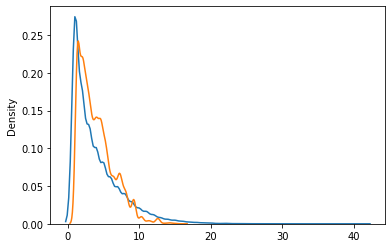

In [100]:
sns.distplot(scy.inverse_transform(yv),hist=False)
sns.distplot(scy.inverse_transform(pd.DataFrame(modelo.predict(Xv))),hist=False)

<AxesSubplot:ylabel='Density'>

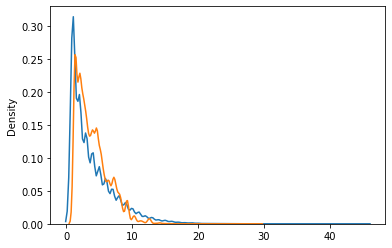

In [101]:
sns.distplot(scy.inverse_transform(yt),hist=False)
sns.distplot(scy.inverse_transform(pd.DataFrame(modelo.predict(Xt))),hist=False)

<AxesSubplot:ylabel='Density'>

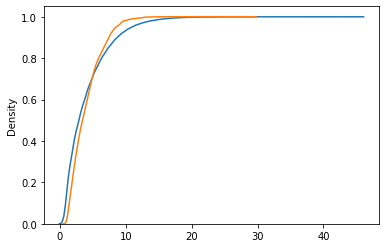

In [102]:
sns.distplot(scy.inverse_transform(yt),hist=False,kde_kws={'cumulative':True})
sns.distplot(scy.inverse_transform(pd.DataFrame(modelo.predict(Xt))),hist=False,kde_kws={'cumulative':True})

<AxesSubplot:ylabel='Density'>

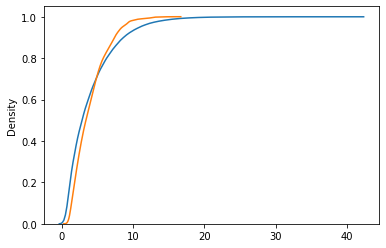

In [103]:
sns.distplot(scy.inverse_transform(yv),hist=False,kde_kws={'cumulative':True})
sns.distplot(scy.inverse_transform(pd.DataFrame(modelo.predict(Xv))),hist=False,kde_kws={'cumulative':True})

## Resultados del modelo 

In [104]:
Arb=Xe.copy()

In [105]:
Arb['y']=ye['VolumenY']
Arb['y^e']=scy.inverse_transform(pd.DataFrame(modelo.predict(Xp)))

In [106]:
Arb

v_mean_max_Volumen_10  v_mean_max_total_amount_10  \
0                         0.6                       8.696   
1                         0.6                      13.137   
2                         0.0                       0.000   
3                         0.2                       3.410   
4                         0.3                       3.790   
...                       ...                         ...   
103136                    1.6                      22.779   
103137                    0.3                       3.150   
103138                    4.5                      59.506   
103139                    0.8                      10.715   
103140                    2.2                      28.041   

        v_mean_max_extra_12  v_mean_max_trip_distance_12  \
0                  0.250000                     1.078333   
1                  0.291667                     2.812500   
2                  0.000000                     0.000000   
3                  0.083333                     0.707500   
4                  0.125000                     0.768333   
...                     ...                          ...   
103136             0.750000                     4.264167   
103137             0.208333                     0.700833   
103138             2.458333                    10.893333   
103139             0.416667                     1.995833   
103140             1.333333                     7.685000   

        v_mean_max_tolls_amount_10  v_min_max_Volumen_14  v_min_max_extra_10  \
0                            0.000                   0.0                 0.0   
1                            0.576                   0.0                 0.0   
2                            0.000                   0.0                 0.0   
3                            0.000                   0.0                 0.0   
4                            0.000                   0.0                 0.0   
...                            ...                   ...                 ...   
103136                       0.000                   0.0                 0.0   
103137                       0.000                   0.0                 0.0   
103138                       0.576                   1.0                 0.5   
103139                       0.000                   0.0                 0.0   
103140                       0.000                   0.0                 0.0   

        v_min_max_fare_amount_12  v_max_max_total_amount_12  \
0                            0.0                      62.41   
1                            0.0                      45.36   
2                            0.0                       0.00   
3                            0.0                      17.30   
4                            0.0                      33.10   
...                          ...                        ...   
103136                       0.0                      49.22   
103137                       0.0                      20.34   
103138                       3.0                     170.81   
103139                       0.0                      50.50   
103140                       0.0                      85.19   

        v_min_max_tolls_amount_12  ...  v_min_max_Volumen_2  \
0                             0.0  ...                  0.0   
1                             0.0  ...                  0.0   
2                             0.0  ...                  0.0   
3                             0.0  ...                  0.0   
4                             0.0  ...                  0.0   
...                           ...  ...                  ...   
103136                        0.0  ...                  2.0   
103137                        0.0  ...                  0.0   
103138                        0.0  ...                  1.0   
103139                        0.0  ...                  0.0   
103140                        0.0  ...                  1.0   

        v_min_max_extra_4  v_max_max_tolls_amount_2  \
0                     0.

In [480]:
np.abs(Arb['y']-Arb['y^e']).mean()

43.22259134898378

In [107]:
np.abs((Arb['y']-Arb['y^e'])/Arb['y']).mean()

0.6468516187140506

In [125]:
Tabla=Arb[['hora','fk_id_PUZone','ancla','y','y^e']]

In [134]:
graf=Tabla.loc[Tabla['ancla']==363]

In [127]:
graf

hora  fk_id_PUZone  ancla  y       y^e
102182     0            48    363  1  5.151737
102183     0            68    363  3  3.234657
102184     0            79    363  7  5.840985
102185     0            90    363  1  3.553058
102186     0           100    363  1  3.234657
...      ...           ...    ... ..       ...
103136    23           239    363  3  2.375398
103137    23           244    363  1  1.305132
103138    23           249    363  5  5.237692
103139    23           262    363  2  1.305132
103140    23           263    363  6  2.579941

[959 rows x 5 columns]

In [135]:
graf=graf[['hora','y','y^e']].groupby('hora').sum().reset_index()

In [136]:
graf

hora    y         y^e
0      0   83  106.611545
1      1   60   78.576208
2      2   35   61.758601
3      3   19   33.783497
4      4   15   26.417494
5      5   27   26.402589
6      6   35   37.207740
7      7   59   64.340955
8      8   89   84.059100
9      9  108  116.596432
10    10  128  140.845485
11    11  130  158.765666
12    12  137  164.939501
13    13  165  193.547628
14    14  203  198.002546
15    15  200  189.568403
16    16  202  195.426381
17    17  208  206.185479
18    18  222  210.926113
19    19  222  203.398383
20    20  207  184.583107
21    21  202  197.086008
22    22  169  163.624461
23    23  125  146.176377

In [239]:
graf['y^e']=round(graf['y^e'])

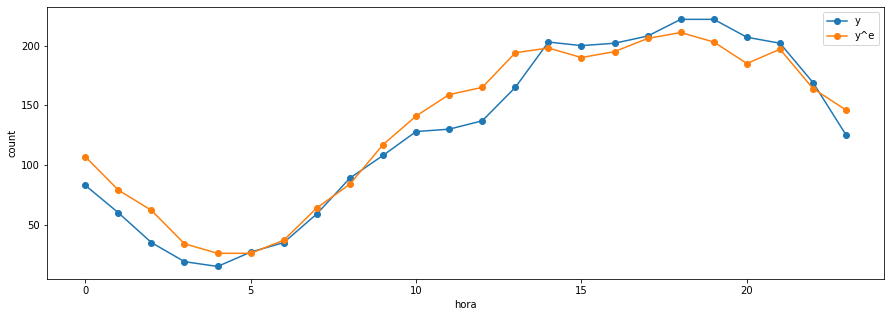

In [240]:
ax=graf.plot(x='hora', y=['y', 'y^e'], kind='line', style="-o", figsize=(15,5))
ax.set_ylabel("count")
plt.show()

## Red neuronal

In [138]:
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [142]:
Xt, Xv, yt, yv = train_test_split(Xp,ys,train_size=0.7)

In [146]:
MaxN = len(best) 
hyper_param = dict(hidden_layer_sizes=[(
    a,
    b,
    c,
) for a in range(1, MaxN + 1) for b in range(1, MaxN + 1)
                                       for c in range(1, MaxN + 1)],
                   activation=['tanh'],
                   alpha=np.arange(0.01, 1, 0.01),
                   learning_rate=['constant', 'invscaling', 'adaptive'],
                   solver=['lbfgs', 'sgd', 'adam'])

In [147]:
red = MLPRegressor()

In [150]:
grid = RandomizedSearchCV(estimator=red,
                          n_iter=10,
                    param_distributions=hyper_param,
                    error_score='neg_mean_absolute_error',
                    cv=5,
                    n_jobs=-1,
                    verbose=True)

In [151]:
grid.fit(Xt,yt) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.3min finished


RandomizedSearchCV(cv=5, error_score='neg_mean_absolute_error',
                   estimator=MLPRegressor(), n_jobs=-1,
                   param_distributions={'activation': ['tanh'],
                                        'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4...
                                        'hidden_layer_sizes': [(1, 1, 1),
                                                               (1, 1, 2),
                                                               (1, 1, 3),
                                                               (1, 1, 4),
                                                               (1, 1, 5),
                                                               (1, 1, 6),
                                                      

In [152]:
red=grid.best_estimator_ 

In [153]:
grid.best_score_

0.4859552836241014

<AxesSubplot:ylabel='Density'>

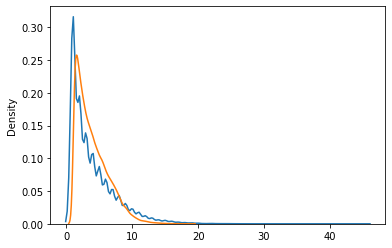

In [155]:
sns.distplot(scy.inverse_transform(yt),hist=False)
sns.distplot(scy.inverse_transform(pd.DataFrame(red.predict(Xt))),hist=False)

<AxesSubplot:ylabel='Density'>

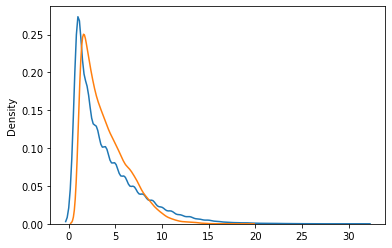

In [156]:
sns.distplot(scy.inverse_transform(yv),hist=False)
sns.distplot(scy.inverse_transform(pd.DataFrame(red.predict(Xv))),hist=False)

<AxesSubplot:ylabel='Density'>

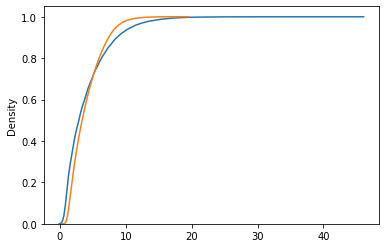

In [157]:
sns.distplot(scy.inverse_transform(yt),hist=False,kde_kws={'cumulative':True})
sns.distplot(scy.inverse_transform(pd.DataFrame(red.predict(Xt))),hist=False,kde_kws={'cumulative':True})

<AxesSubplot:ylabel='Density'>

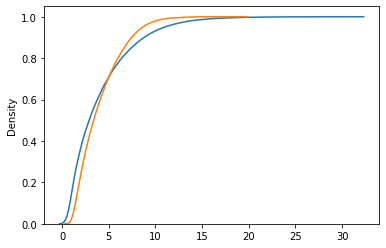

In [158]:
sns.distplot(scy.inverse_transform(yv),hist=False,kde_kws={'cumulative':True})
sns.distplot(scy.inverse_transform(pd.DataFrame(red.predict(Xv))),hist=False,kde_kws={'cumulative':True})

## Resultados del modelo 

In [159]:
Red=Xe.copy()

In [160]:
Red['y']=ye['VolumenY']
Red['y^e']=scy.inverse_transform(pd.DataFrame(red.predict(Xp)))

In [161]:
Red

v_mean_max_Volumen_10  v_mean_max_total_amount_10  \
0                         0.6                       8.696   
1                         0.6                      13.137   
2                         0.0                       0.000   
3                         0.2                       3.410   
4                         0.3                       3.790   
...                       ...                         ...   
103136                    1.6                      22.779   
103137                    0.3                       3.150   
103138                    4.5                      59.506   
103139                    0.8                      10.715   
103140                    2.2                      28.041   

        v_mean_max_extra_12  v_mean_max_trip_distance_12  \
0                  0.250000                     1.078333   
1                  0.291667                     2.812500   
2                  0.000000                     0.000000   
3                  0.083333                     0.707500   
4                  0.125000                     0.768333   
...                     ...                          ...   
103136             0.750000                     4.264167   
103137             0.208333                     0.700833   
103138             2.458333                    10.893333   
103139             0.416667                     1.995833   
103140             1.333333                     7.685000   

        v_mean_max_tolls_amount_10  v_min_max_Volumen_14  v_min_max_extra_10  \
0                            0.000                   0.0                 0.0   
1                            0.576                   0.0                 0.0   
2                            0.000                   0.0                 0.0   
3                            0.000                   0.0                 0.0   
4                            0.000                   0.0                 0.0   
...                            ...                   ...                 ...   
103136                       0.000                   0.0                 0.0   
103137                       0.000                   0.0                 0.0   
103138                       0.576                   1.0                 0.5   
103139                       0.000                   0.0                 0.0   
103140                       0.000                   0.0                 0.0   

        v_min_max_fare_amount_12  v_max_max_total_amount_12  \
0                            0.0                      62.41   
1                            0.0                      45.36   
2                            0.0                       0.00   
3                            0.0                      17.30   
4                            0.0                      33.10   
...                          ...                        ...   
103136                       0.0                      49.22   
103137                       0.0                      20.34   
103138                       3.0                     170.81   
103139                       0.0                      50.50   
103140                       0.0                      85.19   

        v_min_max_tolls_amount_12  ...  v_min_max_Volumen_2  \
0                             0.0  ...                  0.0   
1                             0.0  ...                  0.0   
2                             0.0  ...                  0.0   
3                             0.0  ...                  0.0   
4                             0.0  ...                  0.0   
...                           ...  ...                  ...   
103136                        0.0  ...                  2.0   
103137                        0.0  ...                  0.0   
103138                        0.0  ...                  1.0   
103139                        0.0  ...                  0.0   
103140                        0.0  ...                  1.0   

        v_min_max_extra_4  v_max_max_tolls_amount_2  \
0                     0.

In [162]:
np.abs(Red['y']-Red['y^e']).mean()

1.712710981239714

In [163]:
np.abs((Red['y']-Red['y^e'])/Red['y']).mean()

0.639757765974529

In [175]:
Tabla2=Red[['hora','fk_id_PUZone','ancla','y','y^e']]

In [234]:
graf2=Tabla2.loc[Tabla2['ancla']==363]

In [235]:
graf2

hora  fk_id_PUZone  ancla  y       y^e
102182     0            48    363  1  5.035311
102183     0            68    363  3  3.391514
102184     0            79    363  7  5.742791
102185     0            90    363  1  2.915592
102186     0           100    363  1  3.354164
...      ...           ...    ... ..       ...
103136    23           239    363  3  2.154105
103137    23           244    363  1  1.540642
103138    23           249    363  5  5.408985
103139    23           262    363  2  1.503159
103140    23           263    363  6  2.327694

[959 rows x 5 columns]

In [236]:
graf2=graf2[['hora','y','y^e']].groupby('hora').sum().reset_index()

In [237]:
graf2['y^e']=round(graf2['y^e'])

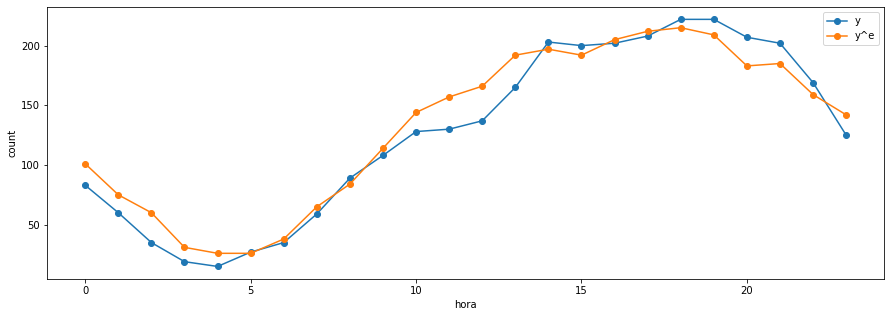

In [238]:
ax=graf2.plot(x='hora', y=['y', 'y^e'], kind='line', style="-o", figsize=(15,5))
ax.set_ylabel("count")
plt.show()